In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#for clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

# for CART and ANN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score , roc_curve
import warnings
warnings.filterwarnings("ignore")

## Problem 1 : clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

**1.1 Read the data and do exploratory data analysis. Describe the data briefly.**

In [2]:
bank = pd.read_csv('bank_marketing_part1_Data.csv')
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
print('The shape of the dataset is',bank.shape)

The shape of the dataset is (210, 7)


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


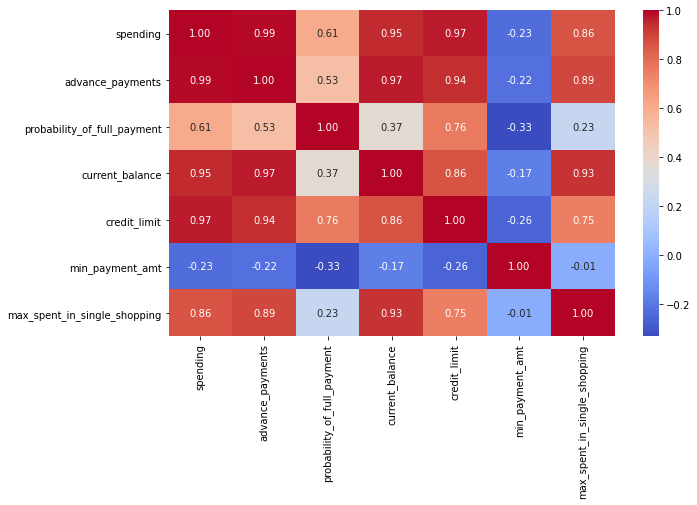

In [6]:
plt.figure(figsize=(10,6))
corr = bank.corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap='coolwarm');

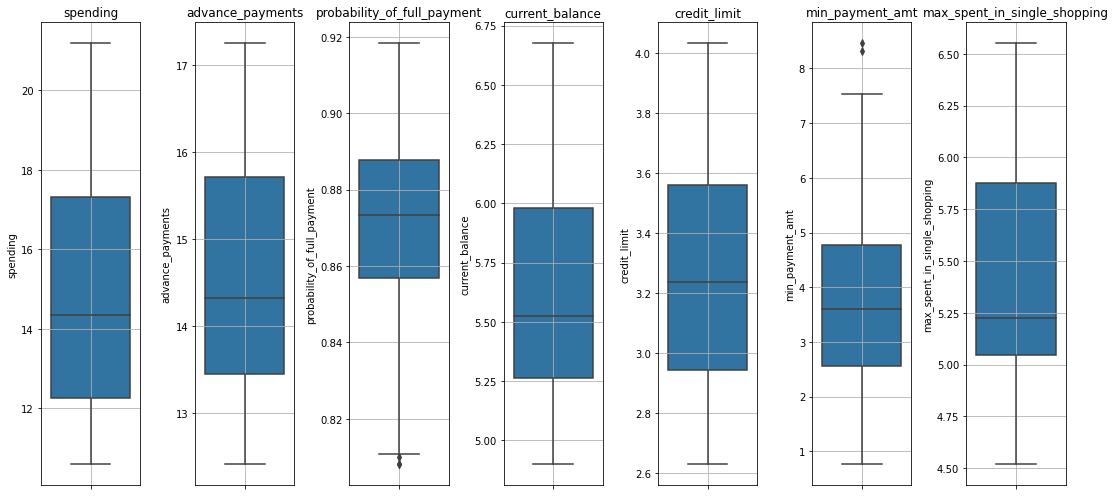

In [7]:
fig=plt.figure(figsize=(15,7))
for i in range(0,len(bank.columns)):
    ax=fig.add_subplot(1,7,i+1)
    sns.boxplot(y=bank[bank.columns[i]])
    ax.set_title(bank.columns[i])
    plt.grid()
plt.tight_layout()

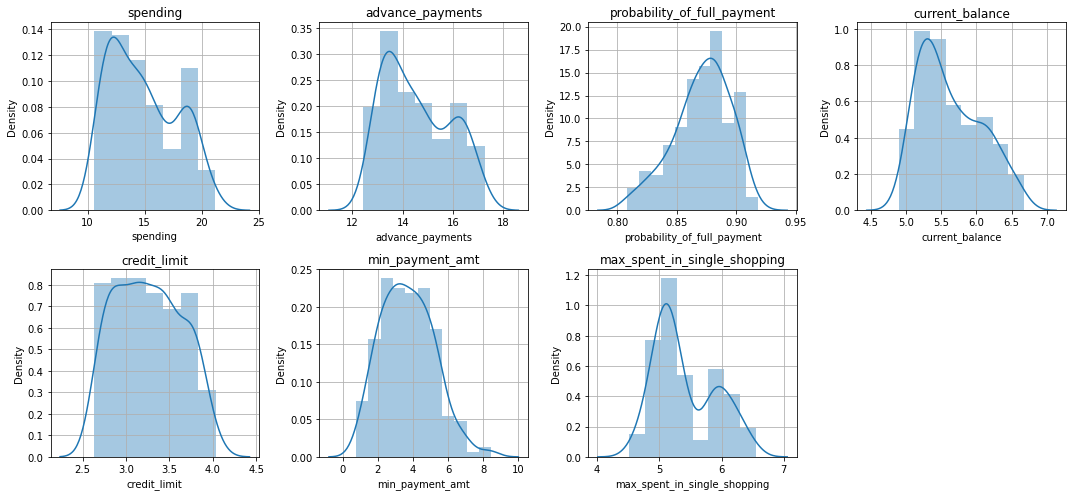

In [8]:
fig=plt.figure(figsize=(15,7))
for i in range(0,len(bank.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(bank[bank.columns[i]])
    ax.set_title(bank.columns[i])
    plt.grid()
plt.tight_layout()

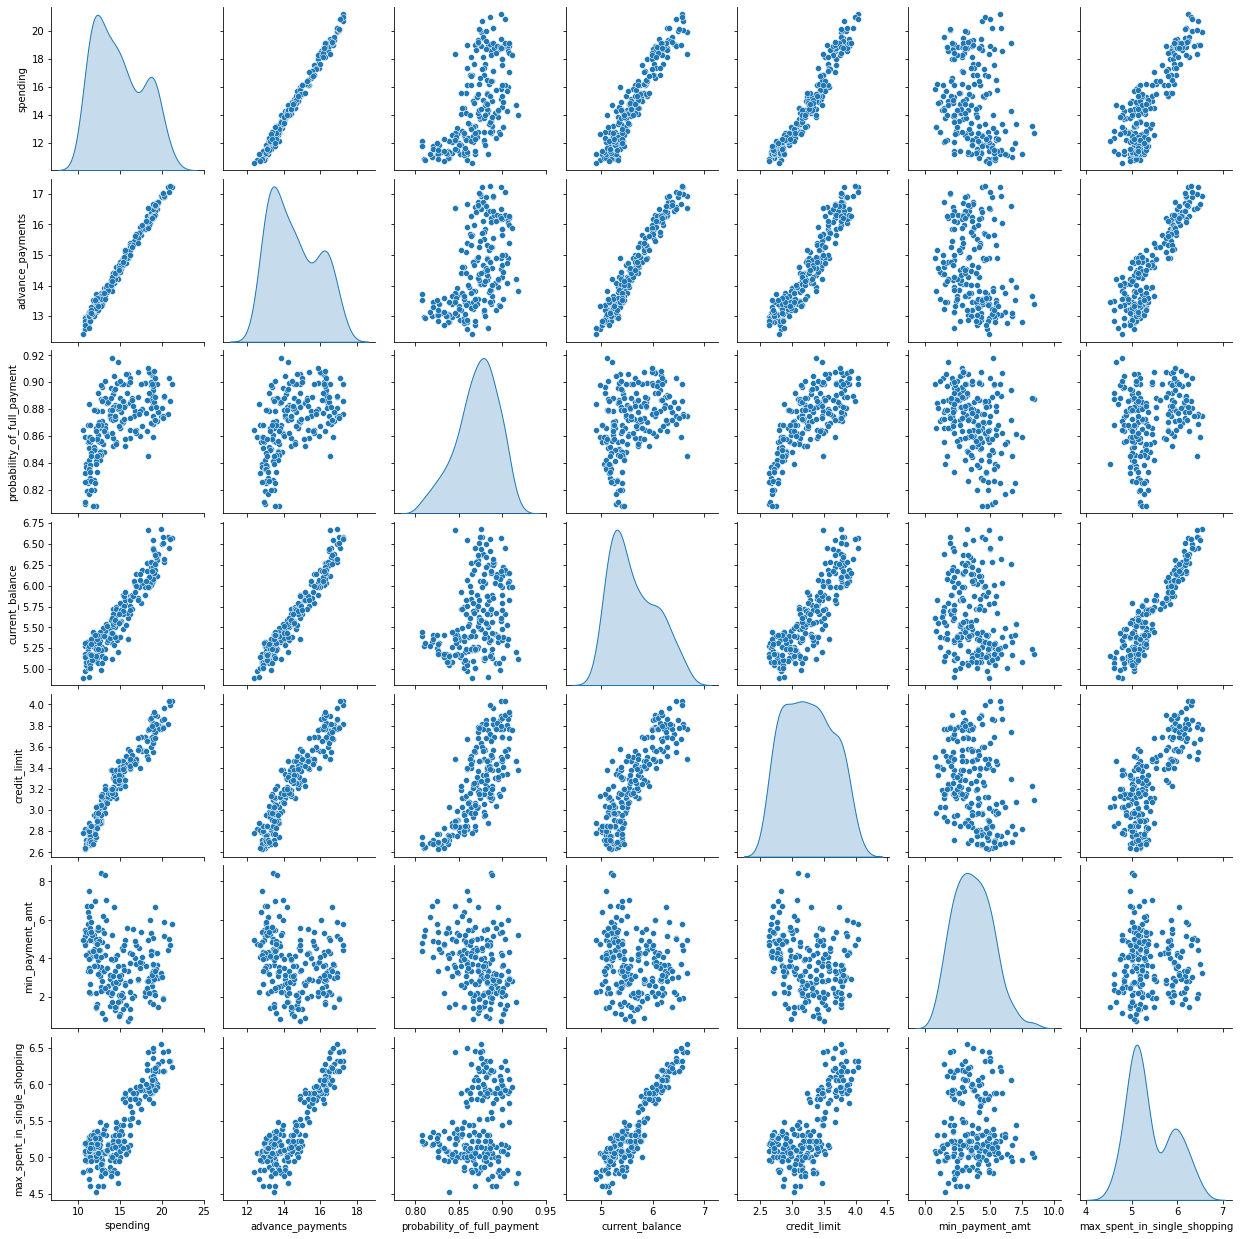

In [9]:
sns.pairplot(data=bank,diag_kind='kde');

**1.2  Do you think scaling is necessary for clustering in this case? Justify**

Scaling needs to be done as the values of the variables are different and vary too much , for example the spending, advance_payments are in different values and this may get more weightage. For this reason the data should be definitely scaled.

I have used **StandardScaler** from _sklearn_ below

In [10]:
sc = StandardScaler()
bankscaled = sc.fit_transform(bank)
bankscaled = pd.DataFrame(bankscaled, columns=bank.columns)
bankscaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


**1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

In [11]:
wardlink = linkage(bankscaled ,method='ward')

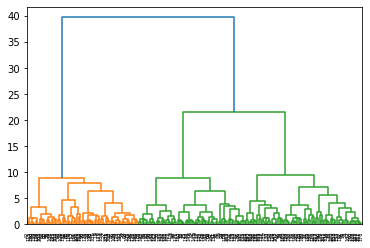

In [12]:
dend = dendrogram(wardlink)

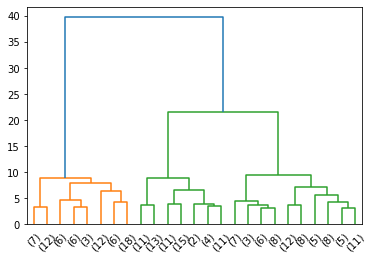

In [13]:
dend = dendrogram(wardlink, truncate_mode = 'lastp',p=25)

In [14]:
cluster = fcluster(wardlink, 3,criterion='maxclust')

In [15]:
bankdendo = bankscaled.copy()
bankdendo['cluster'] = cluster
bankdendo.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [16]:
bankdendo.cluster.value_counts().sort_index()

1    70
2    67
3    73
Name: cluster, dtype: int64

From the above we can see that the model is clustered into almost three equal number of clusters, We can cluster the above into high , medium and low spending groups with 1 as high spending , 3 as medium and 2 as low spending groups

**1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.**

In [17]:
bankscaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [18]:
kmeanstwo = KMeans(n_clusters=2,random_state=1)
kmeanstwo.fit(bankscaled)
kmeanstwo.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [19]:
print('The kmeans clustering with n=2 has a inertia of ',round(kmeanstwo.inertia_,2))

The kmeans clustering with n=2 has a inertia of  659.17


In [20]:
kmeansthree = KMeans(n_clusters=3,random_state=1)
kmeansthree.fit(bankscaled)
kmeansthree.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [21]:
print('The kmeans clustering with n=3 has a inertia of ',round(kmeansthree.inertia_,2))

The kmeans clustering with n=3 has a inertia of  430.66


In [22]:
kmeansfour = KMeans(n_clusters=4,random_state=1)
kmeansfour.fit(bankscaled)
kmeansfour.labels_

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [23]:
print('The kmeans clustering with n=4 has a inertia of ',round(kmeansfour.inertia_,2))

The kmeans clustering with n=4 has a inertia of  371.3


In [24]:
wss = []
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(bankscaled)
    wss.append(KM.inertia_)

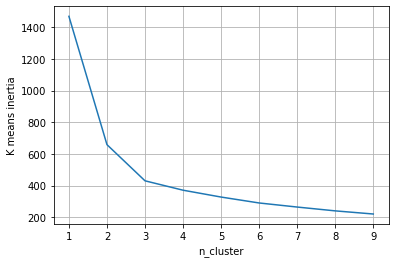

In [25]:
sns.lineplot(x=range(1,10), y=wss);
plt.grid()
plt.xlabel('n_cluster');
plt.ylabel('K means inertia');

In [26]:
print('The kmeans clustering with n=2 has a silhouette score of ',round(silhouette_score(bankscaled,kmeanstwo.labels_),4))
print('The kmeans clustering with n=2 has a silhouette width of ',round(silhouette_samples(bankscaled,kmeanstwo.labels_).min(),4))

The kmeans clustering with n=2 has a silhouette score of  0.4658
The kmeans clustering with n=2 has a silhouette width of  -0.0062


In [27]:
print('The kmeans clustering with n=3 has a silhouette score of ',round(silhouette_score(bankscaled,kmeansthree.labels_),4))
print('The kmeans clustering with n=3 has a silhouette width of ',round(silhouette_samples(bankscaled,kmeansthree.labels_).min(),4))

The kmeans clustering with n=3 has a silhouette score of  0.4007
The kmeans clustering with n=3 has a silhouette width of  0.0027


In [28]:
print('The kmeans clustering with n=4 has a silhouette score of ',round(silhouette_score(bankscaled,kmeansfour.labels_),4))
print('The kmeans clustering with n=4 has a silhouette width of ',round(silhouette_samples(bankscaled,kmeansfour.labels_).min(),4))

The kmeans clustering with n=4 has a silhouette score of  0.3276
The kmeans clustering with n=4 has a silhouette width of  -0.0538


In [29]:
labels = kmeansthree.labels_

In [30]:
bankkm = bankscaled.copy()
bankkm['clusterLabels'] =  labels
bankkm.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusterLabels
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,0
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


From the above we can conclude that n clusters of 3 is the best and suitable parameter from the silhoutte score and samples, 

- silhoutte width ~ 1  : the model is well separated 
- silhoutte width ~ 0  : are separated but not well enough
- silhoutte width ~ -1 : then the model has done a blunder

**1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**

In [31]:
bankdendoprofile = bankdendo.groupby('cluster').mean()
bankdendoprofile['Freq'] = bankdendo.cluster.value_counts()
bankdendoprofile.T

cluster,1,2,3
spending,1.213983,-1.024932,-0.223402
advance_payments,1.217445,-0.999559,-0.250010
probability_of_full_payment,0.568505,-0.972589,0.347508
current_balance,1.198256,-0.881418,-0.340041
credit_limit,1.130594,-1.088249,-0.085328
min_payment_amt,-0.040697,0.832836,-0.725360
max_spent_in_single_shopping,1.242686,-0.583025,-0.656511
Freq,70.000000,67.000000,73.000000


In [32]:
bankkmprofile = bankkm.groupby('clusterLabels').mean()
bankkmprofile['Freq'] = bankkm.clusterLabels.value_counts()
bankkmprofile.T

clusterLabels,0,1,2
spending,-1.030253,1.256682,-0.141119
advance_payments,-1.006649,1.261966,-0.170043
probability_of_full_payment,-0.964905,0.560464,0.449606
current_balance,-0.897685,1.237883,-0.257814
credit_limit,-1.085583,1.164852,0.001647
min_payment_amt,0.694804,-0.045219,-0.661919
max_spent_in_single_shopping,-0.624809,1.292308,-0.585893
Freq,72.000000,67.000000,71.000000


#### Both the models have returned a set of three clusters predominantly 

**Group 1 : High spending group**
- The high spending group should be given incentives to spend more
- Max spent in single shopping is high , so memberships or discount can be given which 
- Coupons and cashbacks can be given on every purchase 
- More credit limit can be given 

**Group 2 : Medium spending group**
- This group has a moderate spending, the credit limit can be increased 
- Since the probability of full payment is almost as equal as high spending group , cashbacks and can be made eligibile for some early bird offers 

**Group 3 : Low spending group**
- Should be reminded to pay bills often 
- Since credit score is low , should set a limit on their purchases 
- Since min payment amount is high ,products like daily needs can be targeted 


## Problem 2 : CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.**

In [33]:
insured = pd.read_csv('insurance_part2_data.csv')
insured.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [34]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [35]:
insured.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

In [36]:
dups = insured.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [37]:
insured.drop_duplicates(inplace=True)

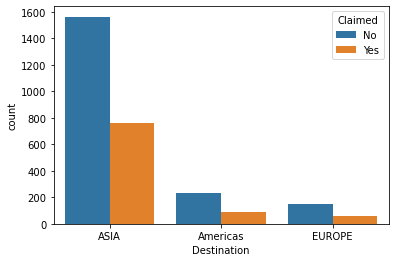

In [38]:
sns.countplot(data=insured,x='Destination',hue='Claimed' );

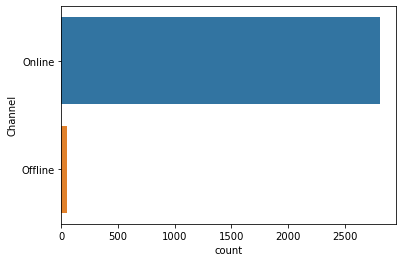

In [39]:
sns.countplot(data=insured ,y='Channel' ,orient='h');

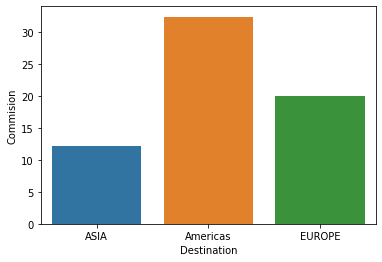

In [40]:
sns.barplot(y='Commision',data=insured,x='Destination',ci=None);

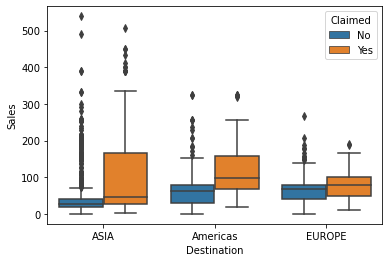

In [41]:
sns.boxplot(data = insured, x='Destination',y='Sales', hue='Claimed');

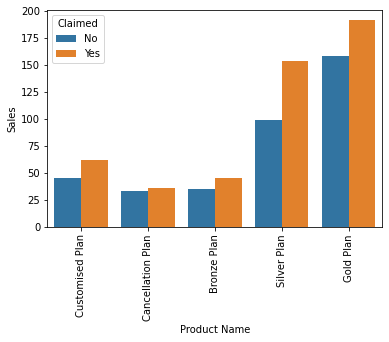

In [42]:
sns.barplot(data = insured, x='Product Name',y='Sales',hue='Claimed',ci=None);
plt.xticks(rotation=90);

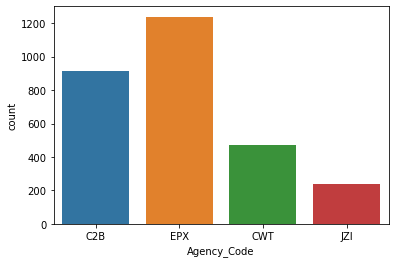

In [43]:
sns.countplot(data = insured, x='Agency_Code');

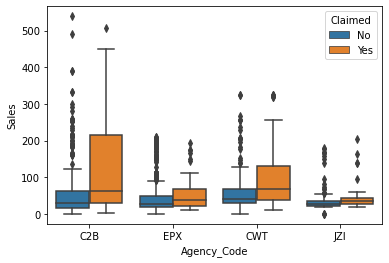

In [44]:
sns.boxplot(data=insured , x='Agency_Code',y='Sales',hue='Claimed');

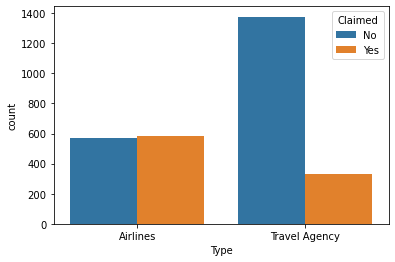

In [45]:
sns.countplot(x='Type',data=insured,hue='Claimed');

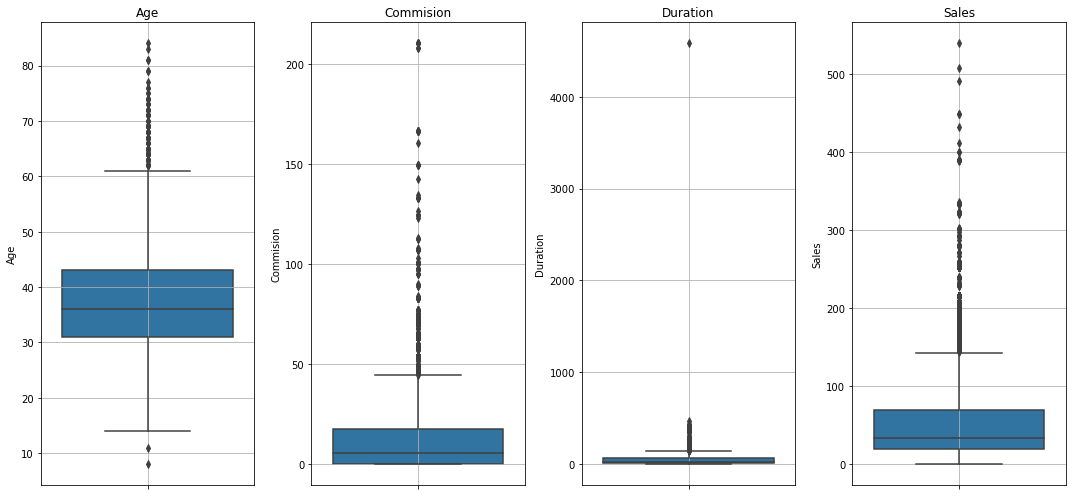

In [46]:
dataplot = insured[['Age','Commision', 'Duration', 'Sales']]
fig=plt.figure(figsize=(15,7))
for i in range(0,len(dataplot.columns)):
    ax=fig.add_subplot(1,4,i+1)
    sns.boxplot(y=dataplot[dataplot.columns[i]])
    ax.set_title(dataplot.columns[i])
    plt.grid()
plt.tight_layout()

#### Imputing the values accordingly and eliminating the outliers

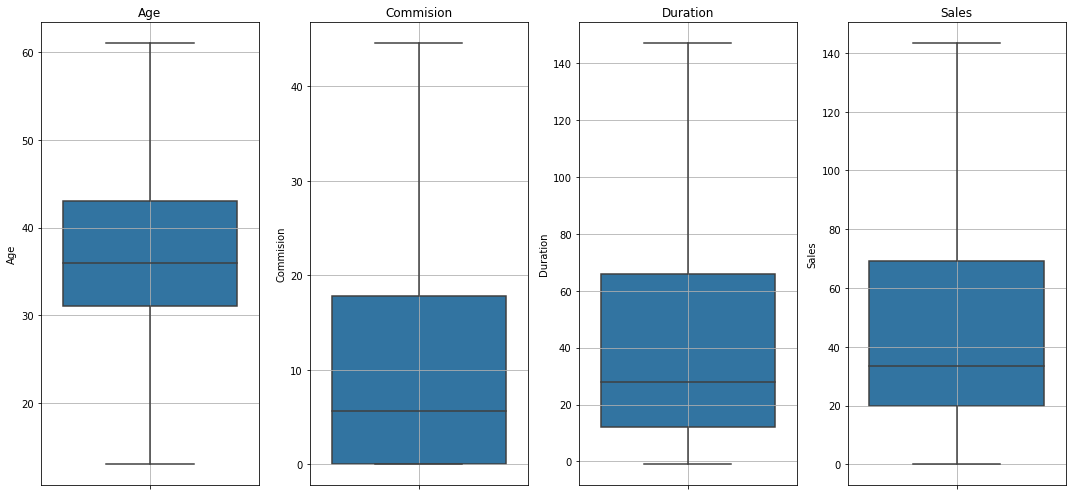

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for i in dataplot.columns:
    lr , ur = remove_outlier(dataplot[i])
    dataplot[i] =  np.where(dataplot[i]>ur , ur , dataplot[i])
    dataplot[i] =  np.where(dataplot[i]<lr , lr , dataplot[i])
    

fig=plt.figure(figsize=(15,7));
for i in range(0,len(dataplot.columns)):
    ax=fig.add_subplot(1,4,i+1)
    sns.boxplot(y=dataplot[dataplot.columns[i]])
    ax.set_title(dataplot.columns[i])
    plt.grid();
plt.tight_layout();

In [48]:
for x in dataplot.columns:
    insured[x] = dataplot[x]

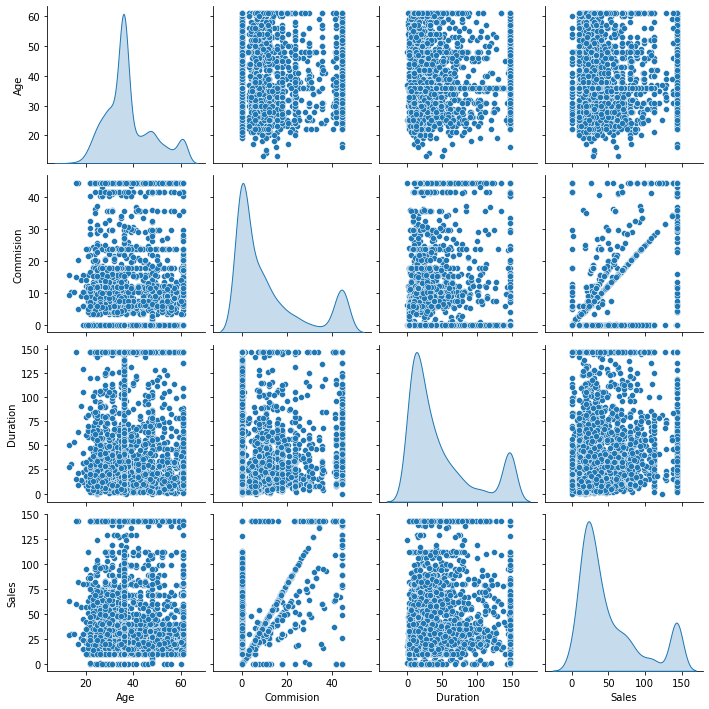

In [49]:
sns.pairplot(insured,diag_kind='kde');

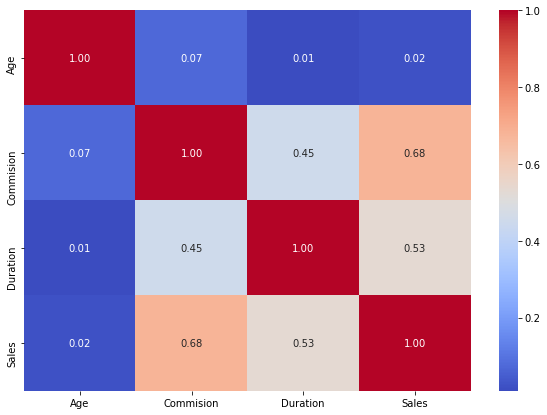

In [50]:
corr = insured.corr()
plt.figure(figsize=(10,7));
sns.heatmap(corr , annot=True,fmt='.2f',cmap='coolwarm');

In [51]:
for column in insured[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',insured[column].nunique())
    print(insured[column].value_counts().sort_index())
    print('--------\n--------')

AGENCY_CODE :  4
C2B     913
CWT     471
EPX    1238
JZI     239
Name: Agency_Code, dtype: int64
--------
--------
TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64
--------
--------
CLAIMED :  2
No     1947
Yes     914
Name: Claimed, dtype: int64
--------
--------
CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64
--------
--------
PRODUCT NAME :  5
Bronze Plan           645
Cancellation Plan     615
Customised Plan      1071
Gold Plan             109
Silver Plan           421
Name: Product Name, dtype: int64
--------
--------
DESTINATION :  3
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64
--------
--------


In [52]:
for column in insured[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    insured[column] = pd.Categorical(insured[column]).codes

In [53]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 193.1 KB


In [54]:
insured.Claimed.value_counts(normalize=True)*100

0    68.053128
1    31.946872
Name: Claimed, dtype: float64

**2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**

In [55]:
X = insured.drop('Claimed',axis=1)
y = insured.Claimed
sc = StandardScaler()
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [57]:
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)

 **Building a Decision Tree**

In [58]:
paramdt = {
    'max_depth': [6,10],
    'min_samples_leaf': [20,40],
    'min_samples_split': [100, 200]
}
dtmodel = DecisionTreeClassifier(criterion='gini',random_state=1)
gridsearchdt = GridSearchCV(estimator=dtmodel , param_grid=paramdt,cv=3)
gridsearchdt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [6, 10], 'min_samples_leaf': [20, 40],
                         'min_samples_split': [100, 200]})

In [59]:
gridsearchdt.best_params_

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 200}

In [60]:
dt = gridsearchdt.best_estimator_

In [61]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.012793
Agency_Code   0.559433
Type          0.000000
Commision     0.039784
Channel       0.000000
Duration      0.053915
Sales         0.289953
Product Name  0.044122
Destination   0.000000


**Building a Random Forest**

In [62]:
paramrf = {
    'max_depth': [10, 20],
    'max_features': [3, 5],
    'min_samples_leaf': [8,10],
    'min_samples_split': [45, 50],
    'n_estimators': [300, 350]
}
rfmodel = RandomForestClassifier(random_state=1)
gridsearchrf = GridSearchCV(estimator=rfmodel,param_grid=paramrf,cv=3)
gridsearchrf.fit(X_train ,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20], 'max_features': [3, 5],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [45, 50],
                         'n_estimators': [300, 350]})

In [63]:
gridsearchrf.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 350}

In [64]:
rf = gridsearchrf.best_estimator_

In [65]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.074849
Agency_Code   0.306426
Type          0.021782
Commision     0.095508
Channel       0.002516
Duration      0.095484
Sales         0.196204
Product Name  0.192793
Destination   0.014439


**Building a Neural Network**

In [66]:
paramann = {
    'hidden_layer_sizes': [100,200],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
    'max_iter' : [10000]
}
annmodel = MLPClassifier()
gridsearchann = GridSearchCV(estimator=annmodel , param_grid=paramann , cv = 3)
gridsearchann.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 200], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [67]:
gridsearchann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.001}

In [68]:
ann = gridsearchann.best_estimator_

**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model**

#### Decision tree on training and testing model

In [69]:
print("The accuracy of the DT model on training data is",round(dt.score(X_train ,y_train) ,4)*100 )

The accuracy of the DT model on training data is 77.62


In [70]:
print("The accuracy of the DT model  on testing data is ",round(dt.score(X_test ,y_test) ,4)*100 )

The accuracy of the DT model  on testing data is  78.0


AUC: 0.792


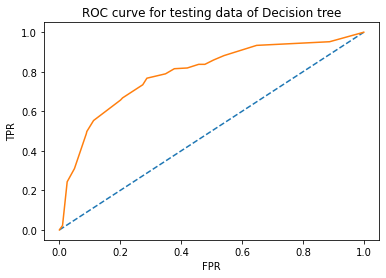

In [71]:
probsdt = dt.predict_proba(X_test)
probsdt = probsdt[:, 1]
dtauc = roc_auc_score(y_test, probsdt)
print('AUC: %.3f' % dtauc)
fprdt, tprdt, thresholdsdt = roc_curve(y_test, probsdt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot( fprdt,  tprdt);
plt.title('ROC curve for testing data of Decision tree');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [72]:
print("The area under the curve score for testing set is", round(dtauc,2))

The area under the curve score for testing set is 0.79


AUC: 0.820


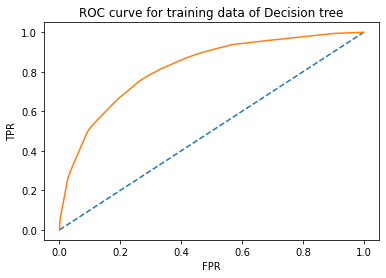

In [73]:
probsdt = dt.predict_proba(X_train)
probsdt = probsdt[:, 1]
dtauc = roc_auc_score(y_train, probsdt)
print('AUC: %.3f' % dtauc)
fprdt, tprdt, thresholdsdt = roc_curve(y_train, probsdt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot( fprdt,  tprdt);
plt.title('ROC curve for training data of Decision tree');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [74]:
print("The area under the curve score for training set is", round(dtauc,2))

The area under the curve score for training set is 0.82


Classification report for training data 

               precision    recall  f1-score   support

           0       0.79      0.90      0.85      1359
           1       0.71      0.51      0.59       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.78      0.76      2002



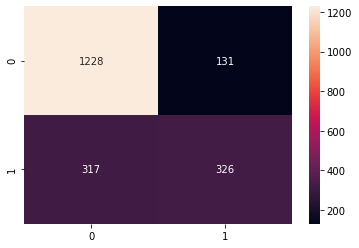

In [75]:
print('Classification report for training data \n\n',classification_report(y_train , dt.predict(X_train)))
sns.heatmap(confusion_matrix( y_train , dt.predict(X_train) ),annot=True, fmt='d');

Classification report for testing data 

               precision    recall  f1-score   support

           0       0.80      0.91      0.85       588
           1       0.72      0.50      0.59       271

    accuracy                           0.78       859
   macro avg       0.76      0.70      0.72       859
weighted avg       0.77      0.78      0.77       859



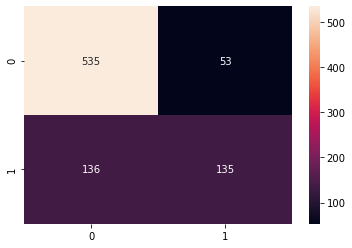

In [76]:
print('Classification report for testing data \n\n',classification_report(y_test , dt.predict(X_test)))
sns.heatmap(confusion_matrix( y_test , dt.predict(X_test) ),annot=True, fmt='d');

#### Random forest on training and testing model

In [77]:
print("The accuracy of the RF model on training data is",round(rf.score(X_train ,y_train) ,4)*100 )

The accuracy of the RF model on training data is 80.17


In [78]:
print("The accuracy of the RF model on testing data is",round(rf.score(X_test ,y_test) ,4)*100 )

The accuracy of the RF model on testing data is 78.93


AUC: 0.863


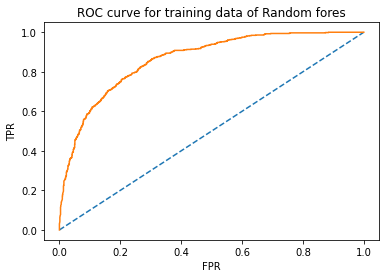

In [79]:
probsrf = rf.predict_proba(X_train)
probsrf = probsrf[:, 1]
rfauc = roc_auc_score(y_train, probsrf)
print('AUC: %.3f' % rfauc)
fprrf, tprrf,  thresholdsrf = roc_curve(y_train, probsrf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot( fprrf,  tprrf);
plt.title('ROC curve for training data of Random fores');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [80]:
print("The area under the curve score for training set is", round(rfauc,3))

The area under the curve score for training set is 0.863


AUC: 0.817


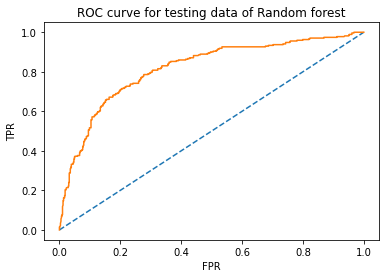

In [81]:
probsrf = rf.predict_proba(X_test)
probsrf = probsrf[:, 1]
rfauc = roc_auc_score(y_test, probsrf)
print('AUC: %.3f' % rfauc)
fprrf, tprrf,  thresholdsrf = roc_curve(y_test, probsrf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot( fprrf,  tprrf);
plt.title('ROC curve for testing data of Random forest');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [82]:
print("The area under the curve score for testing set is", round(rfauc,3))

The area under the curve score for testing set is 0.817


Classification report for training data 

               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.74      0.59      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



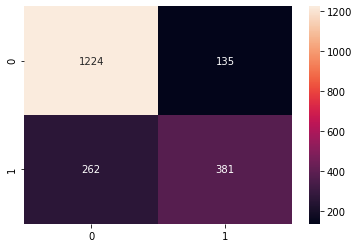

In [83]:
print('Classification report for training data \n\n',classification_report(y_train , rf.predict(X_train)))
sns.heatmap(confusion_matrix( y_train , rf.predict(X_train) ),annot=True, fmt='d');

Classification report for testing data 

               precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



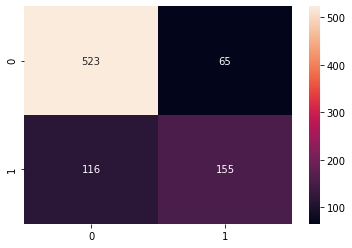

In [96]:
print('Classification report for testing data \n\n',classification_report(y_test , rf.predict(X_test)))
sns.heatmap(confusion_matrix( y_test , rf.predict(X_test) ),annot=True, fmt='d');

#### Aritificial neural network on training model

In [85]:
print("The accuracy of the ANN model on training data is",round(ann.score(X_train ,y_train) ,4)*100 )

The accuracy of the ANN model on training data is 76.52


In [86]:
print("The accuracy of the ANN model on testing data is",round(ann.score(X_test ,y_test) ,4)*100 )

The accuracy of the ANN model on testing data is 77.3


AUC: 0.802


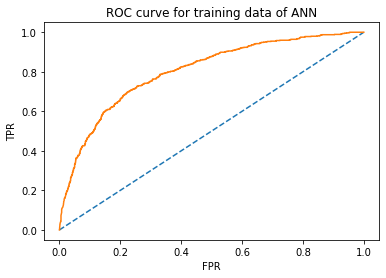

In [87]:
probsann = ann.predict_proba(X_train)
probsann = probsann[:, 1]
annauc = roc_auc_score(y_train, probsann)
print('AUC: %.3f' % annauc)
fprann, tprann, thresholdsann = roc_curve(y_train ,probsann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprann, tprann);
plt.title('ROC curve for training data of ANN');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [88]:
print("The area under the curve score for training set is", round(annauc,3))

The area under the curve score for training set is 0.802


AUC: 0.811


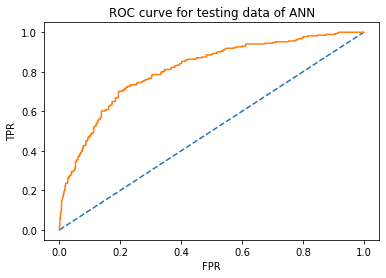

In [89]:
probsann = ann.predict_proba(X_test)
probsann = probsann[:, 1]
annauc = roc_auc_score(y_test, probsann)
print('AUC: %.3f' % annauc)
fprann, tprann, thresholdsann = roc_curve(y_test ,probsann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprann, tprann);
plt.title('ROC curve for testing data of ANN');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [90]:
print("The area under the curve score for testing set is", round(annauc,3))

The area under the curve score for testing set is 0.811


Classification report for training data 

               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1359
           1       0.64      0.61      0.63       643

    accuracy                           0.77      2002
   macro avg       0.73      0.72      0.73      2002
weighted avg       0.76      0.77      0.76      2002



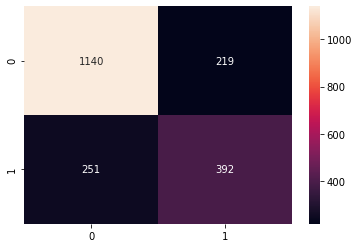

In [91]:
print('Classification report for training data \n\n',classification_report(y_train , ann.predict(X_train)))
sns.heatmap(confusion_matrix( y_train , ann.predict(X_train) ),annot=True, fmt='d');

Classification report for testing data 

               precision    recall  f1-score   support

           0       0.82      0.85      0.84       588
           1       0.65      0.61      0.63       271

    accuracy                           0.77       859
   macro avg       0.74      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



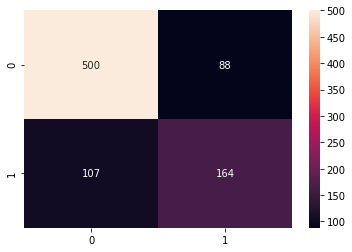

In [92]:
print('Classification report for testing data \n\n',classification_report(y_test , ann.predict(X_test)))
sns.heatmap(confusion_matrix( y_test , ann.predict(X_test) ),annot=True, fmt='d');

 **2.4 Final Model: Compare all the model and write an inference which model is best/optimized.**

In [93]:
models = [dt,rf , ann]
model_name = {dt:'Decision Tree' ,rf:'Random Forest',ann:'ANN'}

Accuracy for Decision Tree model is 
 0.779976717112922


Classification report for Decision Tree model  is 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       588
           1       0.72      0.50      0.59       271

    accuracy                           0.78       859
   macro avg       0.76      0.70      0.72       859
weighted avg       0.77      0.78      0.77       859



Confusion matrix for Decision Tree model is


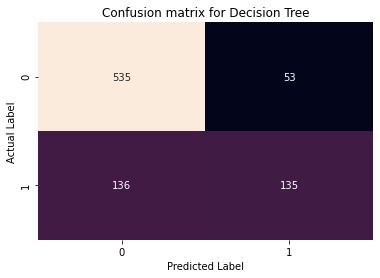

Accuracy for Random Forest model is 
 0.789289871944121


Classification report for Random Forest model  is 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



Confusion matrix for Random Forest model is


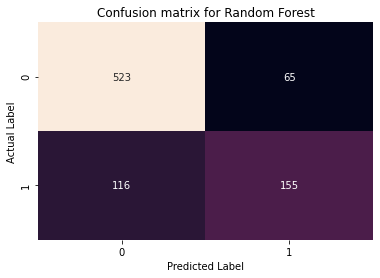

Accuracy for ANN model is 
 0.7729918509895227


Classification report for ANN model  is 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       588
           1       0.65      0.61      0.63       271

    accuracy                           0.77       859
   macro avg       0.74      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



Confusion matrix for ANN model is


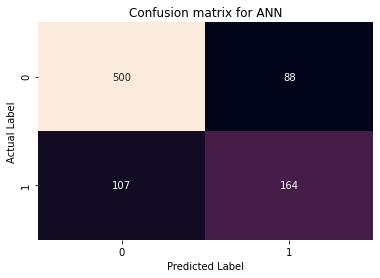

In [94]:
for i in models:
    print('Accuracy for {} model is'.format(model_name[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model  is'.format(model_name[i]),'\n',classification_report(y_test , i.predict(X_test)))
    print('\n')
    print('Confusion matrix for {} model is'.format(model_name[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)) , annot=True , fmt='d',cbar=False)
    plt.title('Confusion matrix for {}'.format(model_name[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

Area under the curve for Decision Tree Classification Model is 0.7922942239626478
Area under the curve for Random Forest Classification Model is 0.8165367623063986
Area under the curve for Artificial Neural Network Model is 0.8108856088560885


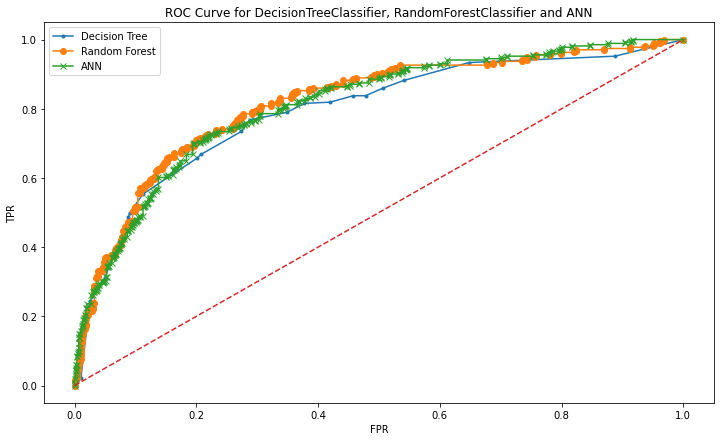

In [95]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_test,ann.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, ann.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(model_name.values())
plt.show()


From above we can infer that the RF model is the best model and has better accuracy , precision , recall and f1-score.

**2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations**

- JZI seems to be spending the least and can be increased with more sales there 
- Most of the insurance is done online,so the offline customers can be pushed to go online so to increase the profits 
- The airlines seem to make more claims so a premium can be charged accordingly 
- People from gold plan claim a lot , so the gold plan can be further split into platinum plan and maybe more sales can be obtained
- Even though the claim is mostly from Asia when compared to America and Europe the commision is a major blackhole in America and Europe

## Conclusion